In [248]:
using MultivariateStats, Distributions, Statistics, StatsBase, Random, LinearAlgebra
using Plots, JSON, Base.Threads, Serialization, LinearAlgebra, LaTeXStrings

loc = joinpath(@__DIR__, "modelling", "functions")
for file in readdir(loc)
    include(joinpath(loc, file))
end

## Problem 1

In [249]:
loc = joinpath(@__DIR__, "modelling", "tests", "problem1")
for file in readdir(loc)
        include(joinpath(loc, file))
end

#### Load Data

In [250]:
q0 = [0,1]
p0 = randn(2)
N = 100
Samples = randn(N);

### Stochastic Gradient Langevin Dynamics

In [251]:
integrator = "SGLD"
steps = "BAOAB"
folder = new_folder(integrator, "problem_1", "investigations", true);

In [252]:
convergenceDataFilename = joinpath(folder, "convergence_data.json")
convergencePlotFilename = joinpath(folder, "convergence_plot.png");

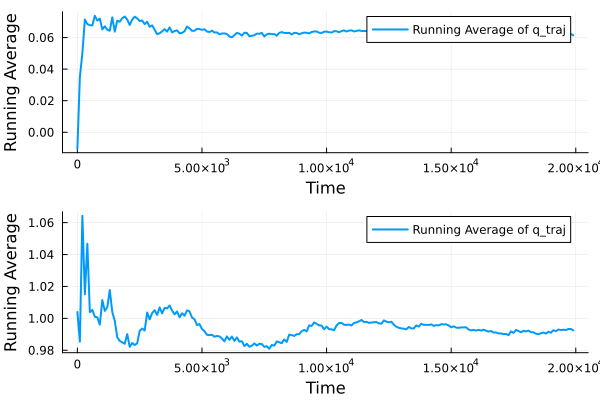

In [253]:
h = 0.005; A = 1.0; n = 10; beta = 1.0
Nsteps = Int(100 * A / h)

testPlot, testDict = convergenceTest(q0, p0, Nsteps, h, A, beta, Samples, BAOAB_step, problem1_grad_U, N, n)

savefig(testPlot, convergencePlotFilename)
savedata(convergenceDataFilename, testDict)
display(testPlot)

In [254]:
distributions_data_filename = joinpath(folder, "distributions_data.json")
distributions_plot_filename = joinpath(folder, "distributions_plot.png");

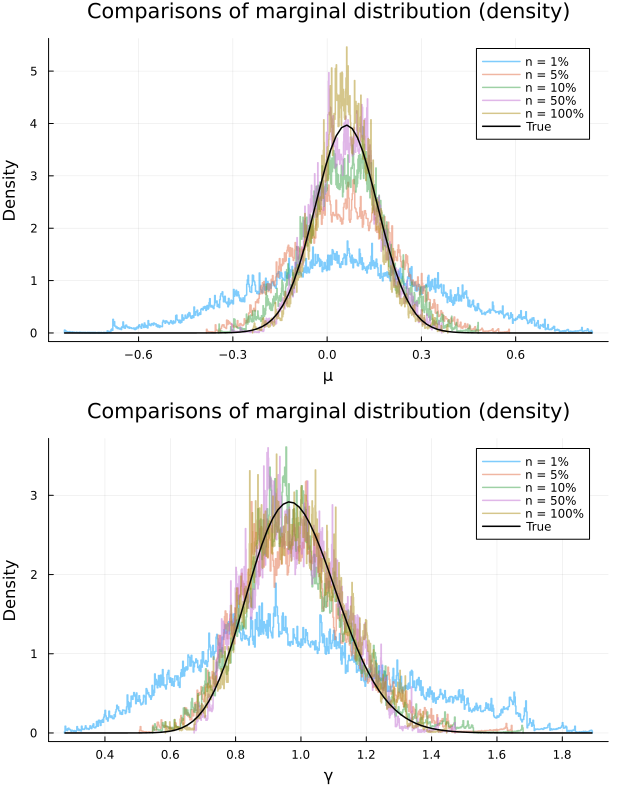

In [255]:
n_values = [1, 5, 10, 50, 100]
h = 0.001; A = 1.0; n = 10; beta = 1.0
Nsteps = Int(100 * A / h)

testPlot, testDict = distributionsTest(q0, p0, Nsteps, h, A, beta, Samples, BAOAB_step, problem1_grad_U, N, n_values)
savedata(distributions_data_filename, testDict)
savefig(testPlot, distributions_plot_filename)

display(testPlot)

In [256]:
path = joinpath(folder, "biasData")
mkdir(path)
biasPlotFilename = joinpath(folder, "bias_plot.png");

In [257]:
h = 0.001; beta = 1; repeats = 1
min_n = 1; max_n = 30; interval_n = 1; sets_n = 5
min_A = 1; max_A = 10; interval_A = 1; sets_A = 5

collectBiasData(folder, path, h, beta, N, repeats, Samples, problem1_grad_U, min_n, max_n, interval_n, sets_n, min_A, max_A, interval_A, sets_A);

[1, 2, 3, 4]
[1, 2, 3, 4]


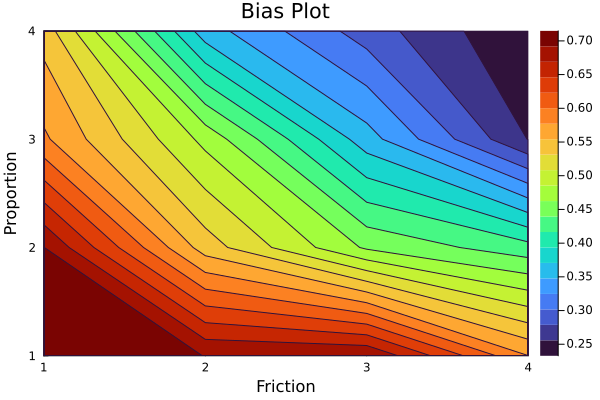

In [ ]:
testPlot = collatePlot(path, 1)
savefig(testPlot, biasPlotFilename)
display(testPlot)

## Stochastic Gradient Nose-Hoover Thermostat 

In [ ]:
integrator = "SGLD"
steps = "BAOAB"
folder = new_folder(integrator, "problem_1", "investigations");

In [ ]:
integrator = "SGNHT"
steps = "BADODAB"
folder = new_folder(integrator, "problem_1", "investigations");

In [ ]:
convergence_data_filename = joinpath(folder, "convergence_data.json")
convergence_plot_filename = joinpath(folder, "convergence_plot.png");

In [ ]:
distributions_data_filename = joinpath(folder, "distributions_data.json")
distributions_plot_filename = joinpath(folder, "distributions_plot.png");

In [ ]:
bias_data_filename = joinpath(folder, "bias_data.json")
bias_plot_filename = joinpath(folder, "bias_plot.png");

### Covariance Controlled Adaptive Langevin Thermostat

In [ ]:
integrator = "CCAdL"
steps = "BADODABC"
folder = new_folder(integrator, "problem_1", "investigations");

In [ ]:
convergence_data_filename = joinpath(folder, "convergence_data.json")
convergence_plot_filename = joinpath(folder, "convergence_plot.png");

In [ ]:
distributions_data_filename = joinpath(folder, "distributions_data.json")
distributions_plot_filename = joinpath(folder, "distributions_plot.png");

In [ ]:
bias_data_filename = joinpath(folder, "bias_data.json")
bias_plot_filename = joinpath(folder, "bias_plot.png");

## Problem 2

In [ ]:
# LOADING AND PREPROCESSING DATA 

using MLDatasets

n_components = 100

# LOAD DATA 
train_x, train_y = MNIST(split=:train)[:]
test_x, test_y = MNIST(split=:test)[:]

# SELECT 7 & 9
ind = findall(x -> x == 7 || x == 9, train_y)
ind = findall(x -> x == 7 || x == 9, test_y)
y_train = train_y[ind]; y_test = test_y[ind]

# PREPROCESS
y_train = ifelse.(y_train .== 7, 1, 0) # Encode
y_test = ifelse.(y_test .== 7, 1, 0) # Encode

# Reshape
x_train = transpose(reshape(train_x, size(train_x, 1)*size(train_x, 2), size(train_x, 3))[:, ind])
x_test = transpose(reshape(test_x, size(test_x, 1)*size(test_x, 2), size(test_x, 3))[:, ind])
x_train = x_train / 255.0; x_test = x_test / 255.0 # Scale

# PCA
pca_model = fit(PCA, Matrix(x_train'), maxoutdim=n_components)
x_train = MultivariateStats.transform(pca_model, Matrix(x_train'))
pca_model = fit(PCA, Matrix(x_test'), maxoutdim=n_components)
x_test = MultivariateStats.transform(pca_model, Matrix(x_test'))

train = hcat(x_train', y_train)
test = hcat(x_test', y_test);

### Stochastic Gradient Langevin Dynamics

In [ ]:
integrator = "SGLD"
steps = "BAOAB"
folder = new_folder(integrator, "problem_2", "investigations");

In [ ]:
convergence_data_filename = joinpath(folder, "convergence_data.json")
convergence_plot_filename = joinpath(folder, "convergence_plot.png");

In [ ]:
accuracy_data_filename = joinpath(folder, "accuracy_data.json")
accuracy_plot_filename = joinpath(folder, "accuracy_plot.png");

### Stochastic Gradient Nose-Hoover Thermostat

In [ ]:
integrator = "SGNHT"
steps = "BADODAB"
folder = new_folder(integrator, "problem_s", "investigations");

In [ ]:
convergence_data_filename = joinpath(folder, "convergence_data.json")
convergence_plot_filename = joinpath(folder, "convergence_plot.png");

In [ ]:
accuracy_data_filename = joinpath(folder, "accuracy_data.json")
accuracy_plot_filename = joinpath(folder, "accuracy_plot.png");

### Covariance Controlled Adaptive Langevin Thermostat

In [ ]:
integrator = "CCAdL"
steps = "BADODABC"
folder = new_folder(integrator, "problem_s", "investigations");

In [ ]:
convergence_data_filename = joinpath(folder, "convergence_data.json")
convergence_plot_filename = joinpath(folder, "convergence_plot.png");

In [ ]:
accuracy_data_filename = joinpath(folder, "accuracy_data.json")
accuracy_plot_filename = joinpath(folder, "accuracy_plot.png");